In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cats = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2023/2023-01-31/cats_uk.csv")
ref = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2023/2023-01-31/cats_uk_reference.csv")


In [ ]:
cats.head()

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,study_name
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,Pet Cats United Kingdom
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,Pet Cats United Kingdom
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,Pet Cats United Kingdom
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,Pet Cats United Kingdom
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,Pet Cats United Kingdom


In [ ]:
ref.head()

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Tommy-Tag,Tommy,Felis catus,2017-06-03T01:02:09Z,2017-06-10T02:10:52Z,True,12.5,Neutered,m,12.5,2,True,True,False,UK,11.0
1,Athena,Athena,Felis catus,2017-06-24T01:02:13Z,2017-06-30T23:59:32Z,True,3.0,Spayed,f,7.5,2,True,True,False,UK,3.0
2,Ares,Ares,Felis catus,2017-06-24T01:03:57Z,2017-06-30T23:58:01Z,NaN,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Lola,Lola,Felis catus,2017-06-24T01:18:49Z,2017-06-30T09:04:40Z,True,3.0,Spayed,f,17.5,1,True,True,False,UK,10.0
4,Maverick,Maverick,Felis catus,2017-06-25T01:04:35Z,2017-07-03T09:10:07Z,True,3.0,Neutered,m,12.5,1,True,True,True,UK,7.0


In [ ]:

cats["timestamp"] = pd.to_datetime(cats["timestamp"], errors="coerce", utc=True)
cats["hour"] = cats["timestamp"].dt.hour


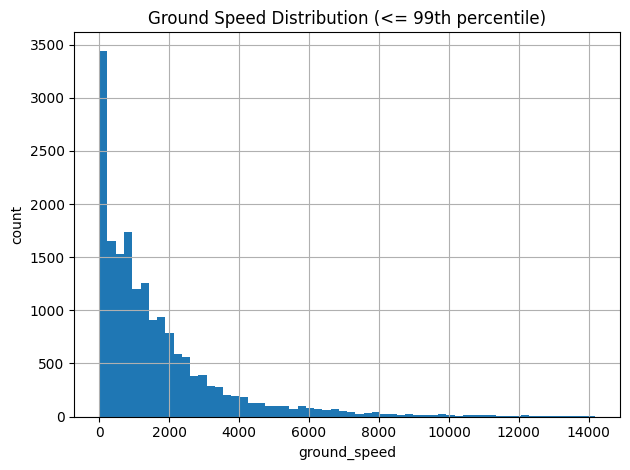

In [ ]:
# “Typical range” speed distribution
cap = cats["ground_speed"].quantile(0.99)

plt.figure()
cats.loc[cats["ground_speed"].notna() & (cats["ground_speed"] <= cap), "ground_speed"].hist(bins=60)
plt.title("Ground Speed Distribution (<= 99th percentile)")
plt.xlabel("ground_speed")
plt.ylabel("count")
plt.tight_layout()
plt.show()

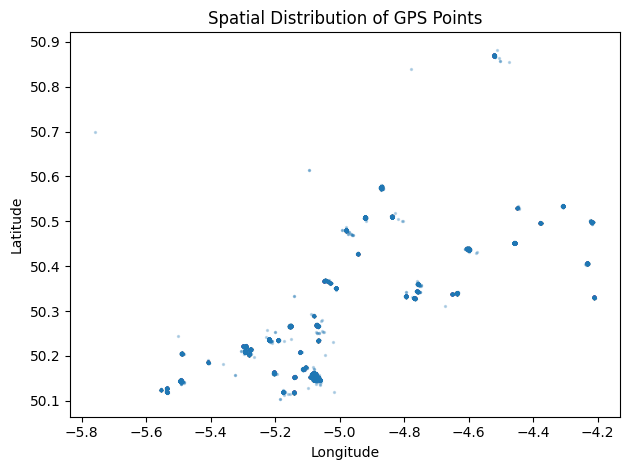

In [ ]:
# Scatter plot of all GPS points
plt.figure()
plt.scatter(cats["location_long"], cats["location_lat"], s=2, alpha=0.25)
plt.title("Spatial Distribution of GPS Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

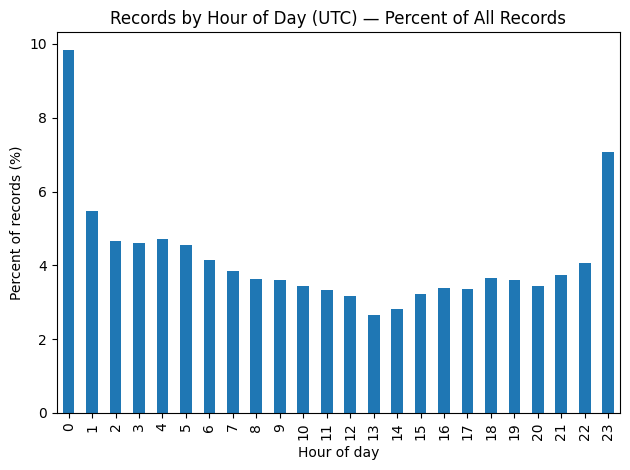

In [ ]:
# Number of records by hour of day
hour_pct = hour_counts / hour_counts.sum() * 100

plt.figure()
hour_pct.plot(kind="bar")
plt.title("Records by Hour of Day (UTC) — Percent of All Records")
plt.xlabel("Hour of day")
plt.ylabel("Percent of records (%)")
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

safi = pd.read_csv("/content/safi_data.csv")

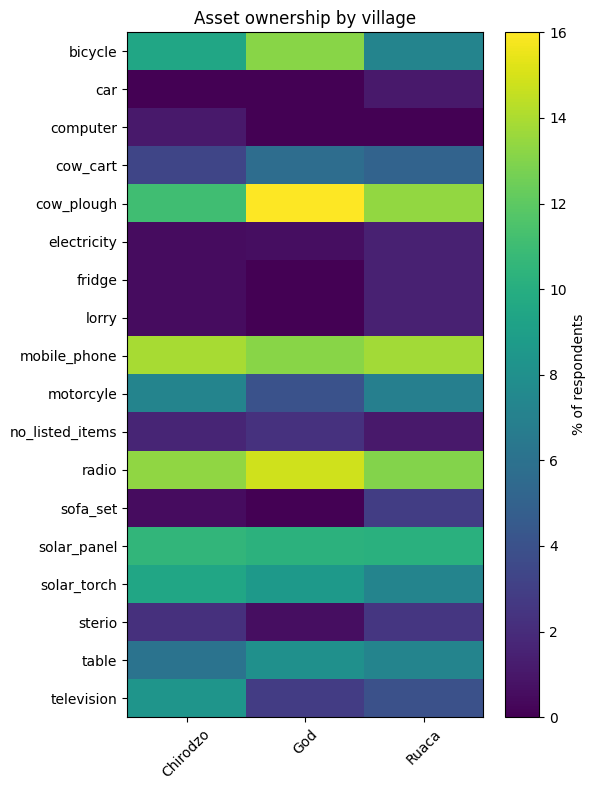

In [2]:
tmp = safi[["village","items_owned"]].copy()
tmp["items"] = tmp["items_owned"].fillna("no_listed_items").replace("", "no_listed_items")
tmp["items"] = tmp["items"].str.split(";")
long = tmp.explode("items")
long["items"] = long["items"].str.strip()

counts = long.groupby(["village","items"]).size().reset_index(name="n")
pct = counts.assign(pct=counts["n"] / counts.groupby("village")["n"].transform("sum") * 100)

heat = pct.pivot(index="items", columns="village", values="pct").fillna(0)

plt.figure(figsize=(6,8))
plt.imshow(heat.values, aspect="auto")
plt.xticks(range(heat.shape[1]), heat.columns, rotation=45)
plt.yticks(range(heat.shape[0]), heat.index)
plt.colorbar(label="% of respondents")
plt.title("Asset ownership by village")
plt.tight_layout()
plt.show()

/tmp/ipython-input-467077111.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order)


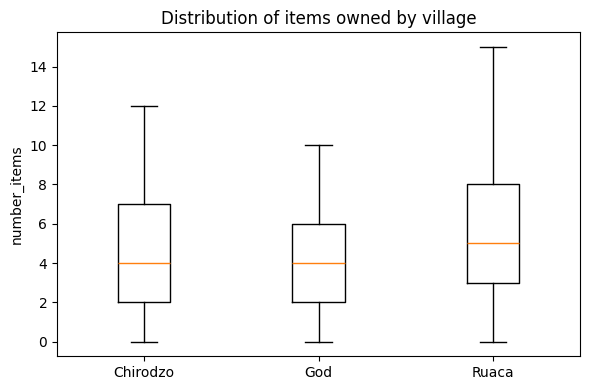

In [3]:
safi["number_items"] = safi["items_owned"].fillna("").apply(
    lambda x: 0 if x == "" else len([i for i in x.split(";") if i.strip()])
)

order = sorted(safi["village"].dropna().unique())
data = [safi.loc[safi["village"]==v, "number_items"].dropna() for v in order]

plt.figure(figsize=(6,4))
plt.boxplot(data, labels=order)
plt.ylabel("number_items")
plt.title("Distribution of items owned by village")
plt.tight_layout()
plt.show()